In [236]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import re
import psycopg2
import json
import math
import datetime
from sqlalchemy import create_engine
import seaborn as sb

import pprint
pp = pprint.PrettyPrinter(indent=4)

from ipywidgets import interact, interactive
import ipywidgets as widgets

from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, plot_confusion_matrix, balanced_accuracy_score
import joblib

from IPython.core.display import HTML
from urllib.parse import urlparse, parse_qs
pd.options.display.max_columns = 150
pd.options.display.max_rows = 150
HTML("<style>.container { width:100% !important; }</style>")



In [353]:
data_raw = pd.read_csv('raw_data/2021-09-01 De Stemming/DS2021_DANS.csv', sep='\t', header=0)
data_raw['Provincie'] = data_raw['Provincie'].replace({
    1:'Antwerpen',
    2:'Limburg',
    3:'Oost-Vlaanderen',
    4:'Vlaams-Brabant',
    5:'West-Vlaanderen'
})
data_raw['Gender'] = data_raw['Gender'].replace({
    1:'Man',
    2:'Vrouw',
    3:'Andere'
})
data_raw['Education'] = data_raw['Education'].replace({
    1:'1_Geen of lager onderwijs',
    2:'2_Middelbaar onderwijs, niet volledig afgewerkt',
    3:'3_Middelbaar onderwijs, volledig afgewerkt',
    4:'4_Hoger niet-universitair onderwijs',
    5:'5_Universitair onderwijs'
})
data_raw['Vote2019_Fed'] = data_raw['Vote2019_Fed'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_sp.a',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Blanco',
    10:'Niet gaan stemmen',
    11:'Mocht nog niet gaan stemmen',
    12:'Ik weet het niet meer'
})

data_raw['VoteChoiceNow'] = data_raw['VoteChoiceNow'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_Vooruit',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Blanco',
    10:'Niet gaan stemmen',
    11:'Mocht nog niet gaan stemmen',
    12:'Ik weet het niet meer'
})

data_raw['MIP_Closed_1'] = data_raw['MIP_Closed_1'].replace({
    1 : 'Belastingen',
    2 : 'Criminaliteit',
    3 : 'Defensie',
    4 : 'Economie',
    5 : 'Functioneren van de democratie',
    6 : 'Gezondheidszorg',
    7 : 'Klimaat',
    8 : 'Migratie',
    9 : 'Milieu',
    10 : 'Mobiliteit',
    11 : 'Onderwijs',
    12 : 'Pensioenen',
    13 : 'Sociale zekerheid',
    14 : 'Staatshervorming',
    15 : 'Welzijn',
    16 : 'Werkgelegenheid',
})

data_raw['MIP_Closed_2'] = data_raw['MIP_Closed_2'].replace({
    1 : 'Belastingen',
    2 : 'Criminaliteit',
    3 : 'Defensie',
    4 : 'Economie',
    5 : 'Functioneren van de democratie',
    6 : 'Gezondheidszorg',
    7 : 'Klimaat',
    8 : 'Migratie',
    9 : 'Milieu',
    10 : 'Mobiliteit',
    11 : 'Onderwijs',
    12 : 'Pensioenen',
    13 : 'Sociale zekerheid',
    14 : 'Staatshervorming',
    15 : 'Welzijn',
    16 : 'Werkgelegenheid',
})

data_raw['IO_HealthCare'] = data_raw['IO_HealthCare'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Migration'] = data_raw['IO_Migration'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Economy'] = data_raw['IO_Economy'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Climate'] = data_raw['IO_Climate'].replace({
    1:'1_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Employment'] = data_raw['IO_Employment'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_Pensions'] = data_raw['IO_Pensions'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['IO_SocialSecurity'] = data_raw['IO_SocialSecurity'].replace({
    1:'1_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})


data_raw['IO_Mobility'] = data_raw['IO_Mobility'].replace({
    1:'4_CD&V',
    2:'2_Groen',
    3:'6_N-VA',
    4:'5_Open VLD',
    5:'1_PVDA',
    6:'3_VOORUIT',
    7:'7_Vlaams Belang',
    8:'Andere',
    9:'Geen enkele partij',
    10:'Alle partijen gelijkwaardig'
})

data_raw['Age_group'] = pd.cut(data_raw['Age'], [0, 25, 35, 45, 55, 65, 150], right=False)

data_raw['cluster'] = 'weet het niet meer'

data_raw.loc[((data_raw['VoteChoiceNow']=='1_PVDA') |
             (data_raw['VoteChoiceNow']=='2_Groen') | 
              (data_raw['VoteChoiceNow']=='3_Vooruit')),'cluster'] = 'links'

data_raw.loc[((data_raw['VoteChoiceNow']=='4_CD&V') |
             (data_raw['VoteChoiceNow']=='5_Open VLD')),'cluster'] = 'centrum'

data_raw.loc[((data_raw['VoteChoiceNow']=='6_N-VA') | 
              (data_raw['VoteChoiceNow']=='7_Vlaams Belang')),'cluster'] = 'rechts'

questions = data_raw.loc[:,[c  for c in data_raw.columns if bool(re.search('Econ_LR_', c)) | bool(re.search('Cult_LR_', c))]]

# Switch signs question vooruit, so links is always 0, rechts 1
# Econ_LR_1: links = 0, rechts = 5
data_raw['Econ_LR_1'] = 5-data_raw['Econ_LR_1']
data_raw['Econ_LR_4'] = 5-data_raw['Econ_LR_4']
data_raw['Econ_LR_11'] = 5-data_raw['Econ_LR_11']
data_raw['Econ_LR_13'] = 5-data_raw['Econ_LR_13']
data_raw['Econ_LR_14'] = 5-data_raw['Econ_LR_14']
# Cultureel: 0=links, 5=rechts
data_raw['Cult_LR_2'] = 5-data_raw['Cult_LR_2']
data_raw['Cult_LR_3'] = 5-data_raw['Cult_LR_3']
data_raw['Cult_LR_15'] = 5-data_raw['Cult_LR_15']
# Klimaat
data_raw['Cult_LR_1'] = 5-data_raw['Cult_LR_1']
data_raw['Cult_LR_6'] = 5-data_raw['Cult_LR_6']
data_raw['Cult_LR_7'] = 5-data_raw['Cult_LR_7']

questions_mapping = {
    'Econ_LR_1':'Omdat leerkrachten een zwaar beroep uitoefenen, moeten ze vervroegd met pensioen kunnen gaan.',
    'Econ_LR_2':'Eerder dan zelf sociale woningen te bouwen, moet de overheid mensen helpen om op de privémarkt te huren.',
    'Econ_LR_3':'De mogelijkheid om in de horeca bij te verdienen tegen een verlaagd belastingtarief (flexi-jobs) moet afgeschaft worden.',
    'Econ_LR_4':'Naar de huisarts gaan, moet volledig gratis worden.',
    'Econ_LR_5':'Europa moet hard optreden tegen lidstaten die zich niet houden aan de Europese begrotingsregels.',
    'Econ_LR_6':'In elke gemeente zou een vast aandeel van de woningen sociale woningen moeten zijn.',
    'Econ_LR_7':'In elke lidstaat van de EU moet er een kinderbijslag ingevoerd worden.',
    'Econ_LR_8':'De VRT mag bedrijven niet langer laten betalen om hun producten in programmas te tonen.',
    'Econ_LR_9':'Werklozen moeten hun uitkering na een tijd verliezen.',
    'Econ_LR_10':'Europa moet hard optreden tegen lidstaten die grote belastingvoordelen toekennen aan sommige bedrijven.',
    'Econ_LR_11':'Ook in het middelbaar onderwijs moet er een maximumfactuur voor de ouders komen.',
    'Econ_LR_12':'Voor pendelaars moet de trein gratis zijn.',
    'Econ_LR_13':'Eigenaars van meerdere huizen moeten meer belast worden.',
    'Econ_LR_14':'De fiscale voordelen voor pensioensparen moeten vervangen worden door een verhoging van de wettelijke pensioenen.',
    'Econ_LR_15':'In heel Europa moet er een minimumloon ingevoerd worden.',
    'Cult_LR_1':'Er moet een Europese taks op vliegtuigbrandstof komen.',
    'Cult_LR_2':'Boerkinis moeten toegelaten worden in openbare zwembaden.',
    'Cult_LR_3':'De overheid moet praktijktesten doen om te controleren op discriminatie bij aanwervingen.',
    'Cult_LR_4':'De Vlaamse overheid mag geen nieuwe moskeeën meer erkennen.',
    'Cult_LR_5':'Europa moet meer genetisch gewijzigde gewassen toelaten.',
    'Cult_LR_6':'De betonstop moet sneller uitgevoerd worden.',
    'Cult_LR_7':'De meest vervuilende autos moeten verboden worden in heel Vlaanderen (lage-emissiezone).',
    'Cult_LR_8':'Over de besteding van een deel van de Vlaamse begroting moeten de burgers rechtstreeks zelf kunnen beslissen.',
    'Cult_LR_9':'n het gemeenschapsonderwijs mogen leerlingen op school geen hoofddoek dragen.',
    'Cult_LR_10':'De verkoop van nieuwe benzine- en dieselwagens moet verboden worden vanaf 2030.',
    'Cult_LR_11':'De aankoop van de nieuwe gevechtsvliegtuigen moet worden teruggedraaid.',
    'Cult_LR_12':'Burgers moeten zelf kunnen kiezen of ze gaan stemmen.',
    'Cult_LR_13':'De EU moet beslissen of het zomeruur of winteruur wordt ingevoerd, niet de lidstaten.',
    'Cult_LR_14':'Ook na 2025 moeten we kerncentrales openhouden.',
    'Cult_LR_15':'De Vlaamse overheid moet praktijktesten doen om discriminatie bij het verhuren van woningen op te sporen.'
}

# Score Vooruit economisch
col_mask = [c for c in data_raw.columns if bool(re.search('huisarts', str(questions_mapping.get(c)))) | 
                                            bool(re.search('uitkering', str(questions_mapping.get(c)))) | 
                                            bool(re.search('maximumfactuur', str(questions_mapping.get(c)))) | 
                                               bool(re.search('meerdere huizen', str(questions_mapping.get(c)))) | 
                                               bool(re.search('pensioensparen', str(questions_mapping.get(c))))]
data_raw['score_economisch_vooruit'] = data_raw.loc[:,col_mask].sum(axis=1)/5

# Score cultureel
col_mask = [c for c in data_raw.columns if bool(re.search('gemeenschapsonderwijs mogen', str(questions_mapping.get(c)))) | 
                                            bool(re.search('Boerkini', str(questions_mapping.get(c)))) | 
                                            bool(re.search('discriminatie bij aanwervingen', str(questions_mapping.get(c)))) | 
                                               bool(re.search('geen nieuwe moskeeën', str(questions_mapping.get(c)))) | 
                                               bool(re.search('discriminatie bij het verhuren', str(questions_mapping.get(c))))]
data_raw['score_cultureel_vooruit'] = data_raw.loc[:,col_mask].sum(axis=1)/5

# Score klimaat
col_mask = [c for c in data_raw.columns if bool(re.search('vliegtuigbrandstof', str(questions_mapping.get(c)))) | 
                                            bool(re.search('betonstop', str(questions_mapping.get(c)))) | 
                                               bool(re.search('lage-emissiezone', str(questions_mapping.get(c))))]
data_raw['score_klimaat_vooruit'] = data_raw.loc[:,col_mask].sum(axis=1)/3                                            
#bool(re.search('genetisch', str(questions_mapping.get(c)))) | 
#bool(re.search('kerncentrales', str(questions_mapping.get(c)))) | 



In [354]:
questions_breuklijnen = data_raw.loc[:,['Satis_Income', 'LeftRight', 'Polinterest', 'EconRegul_Self', 'Immi_Self', 'EnviEcon_Self', 'FreedomSpeech_Self', 'StateReform_Self',
                                       'Eval_Gov_1', 'Eval_Gov_2']]

## Downsampling

todo: optie resample of basis dataset

In [355]:
downsampled_raw_data = data_raw.copy()

In [356]:
value_counts_partijen = pd.DataFrame(downsampled_raw_data['VoteChoiceNow'].value_counts(normalize=True)).reset_index()

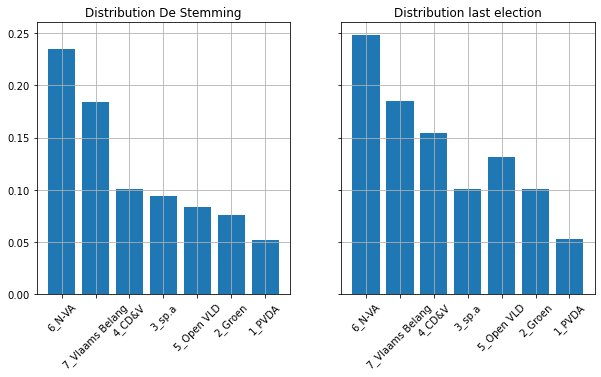

In [357]:
uitslag_2019 = {
    '6_N-VA': 24.8/100,
    '7_Vlaams Belang': 18.5/100,
    '4_CD&V': 15.4/100,
    '5_Open VLD': 13.1/100,
    '3_sp.a': 10.1/100,
    '2_Groen': 10.1/100,
    '1_PVDA': 5.3/100,
    'Ik weet het niet meer':0,
}

fig, axes = plt.subplots(1,2,figsize=(10,5), sharey=True)

value_counts_partijen = pd.DataFrame(downsampled_raw_data['Vote2019_Fed'].value_counts(normalize=True)).reset_index()
value_counts_partijen.columns = ['partij', 'counts_dataset']
exclude = ['Ik weet het niet meer','Niet gaan stemmen', 'Blanco', 'Mocht nog niet gaan stemmen', 'Andere']
value_counts_partijen = value_counts_partijen.loc[~(value_counts_partijen['partij'].isin(exclude)),:]
value_counts_partijen['uitslag_2019'] = value_counts_partijen['partij'].apply(lambda x: uitslag_2019[x])

axes[0].bar(np.arange(len(value_counts_partijen)), value_counts_partijen['counts_dataset'], 
            tick_label=value_counts_partijen['partij'].values)
axes[0].tick_params(axis='x', labelrotation=45 )
axes[0].set_title('Distribution De Stemming')
axes[0].grid()

axes[1].bar(np.arange(len(value_counts_partijen)), value_counts_partijen['uitslag_2019'],
           tick_label=value_counts_partijen['partij'].values)
axes[1].tick_params(axis='x', labelrotation=45 )
axes[1].set_title('Distribution last election')
axes[1].grid()

## PCA

In [358]:
# Demean the questions
mean_per_question = questions.mean()
questions_demeaned = questions - mean_per_question

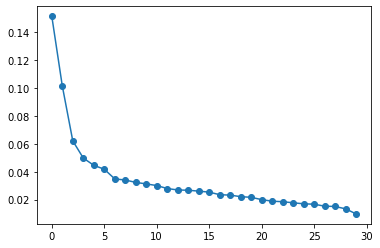

In [359]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(questions_demeaned)

plt.plot(pca.explained_variance_ratio_, 'o-')


In [360]:
pca = PCA(2)
pca_components = pca.fit_transform(questions_demeaned)
data_raw['pca_0'] = pca_components[:,0]
data_raw['pca_1'] = pca_components[:,1]

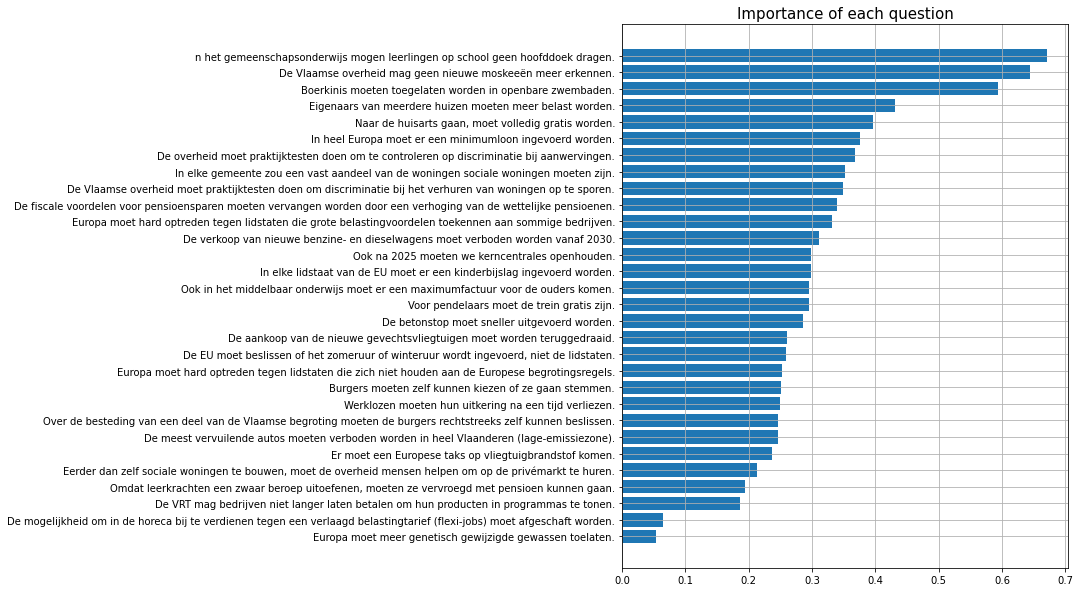

In [361]:
# Most important features for the two principal components
feature_importances = abs( pca.components_ )[0] + abs( pca.components_ )[1]
feature_importances = pd.DataFrame({'importance': feature_importances, 
                                    'question' : [questions_mapping[c] for c in questions.columns]})
feature_importances = feature_importances.sort_values('importance', ascending=True)

fig, ax = plt.subplots(1,1,figsize=(8,10))

ax.barh(width=feature_importances['importance'], 
        y=np.arange(len(feature_importances)), 
        tick_label=feature_importances['question'])
ax.set_title('Importance of each question', size=15)
ax.grid()

## Clustering

In [386]:
print('Select # clusters')
slider = widgets.IntSlider(value=3, min=2, max=8)
display(slider)


Select # clusters


IntSlider(value=3, max=8, min=2)

In [389]:
x_clusters = slider.value

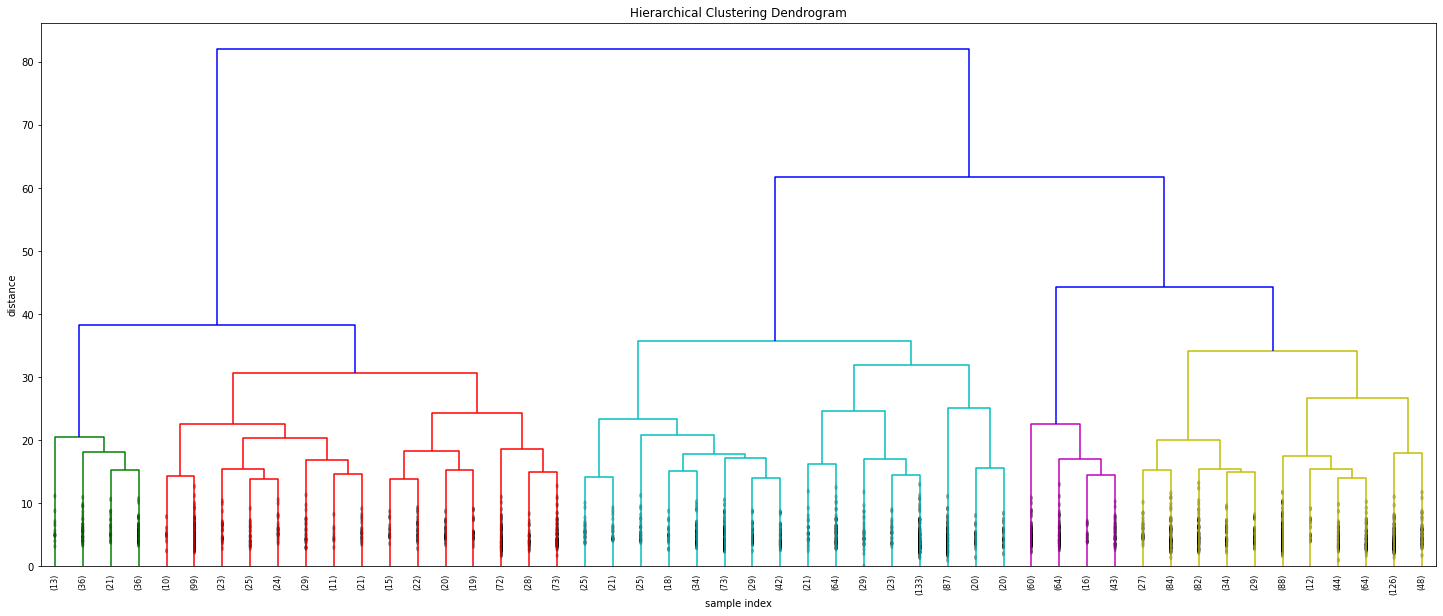

In [390]:
# Cluster de users. Dit duurt even.

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering


Z = linkage(questions, 'ward')

#fig, ax = plt.subplots(1,1,figsize=(25,8))
#ax.scatter(np.arange(len(Z)), Z[:,2])

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',
    p=50,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    show_leaf_counts=True,
    show_contracted=True,
    color_threshold=Z[-(x_clusters-1),2],
)
plt.show()



clustering = AgglomerativeClustering(n_clusters=x_clusters, linkage='ward').fit(questions)

data_raw['cluster'] = clustering.labels_

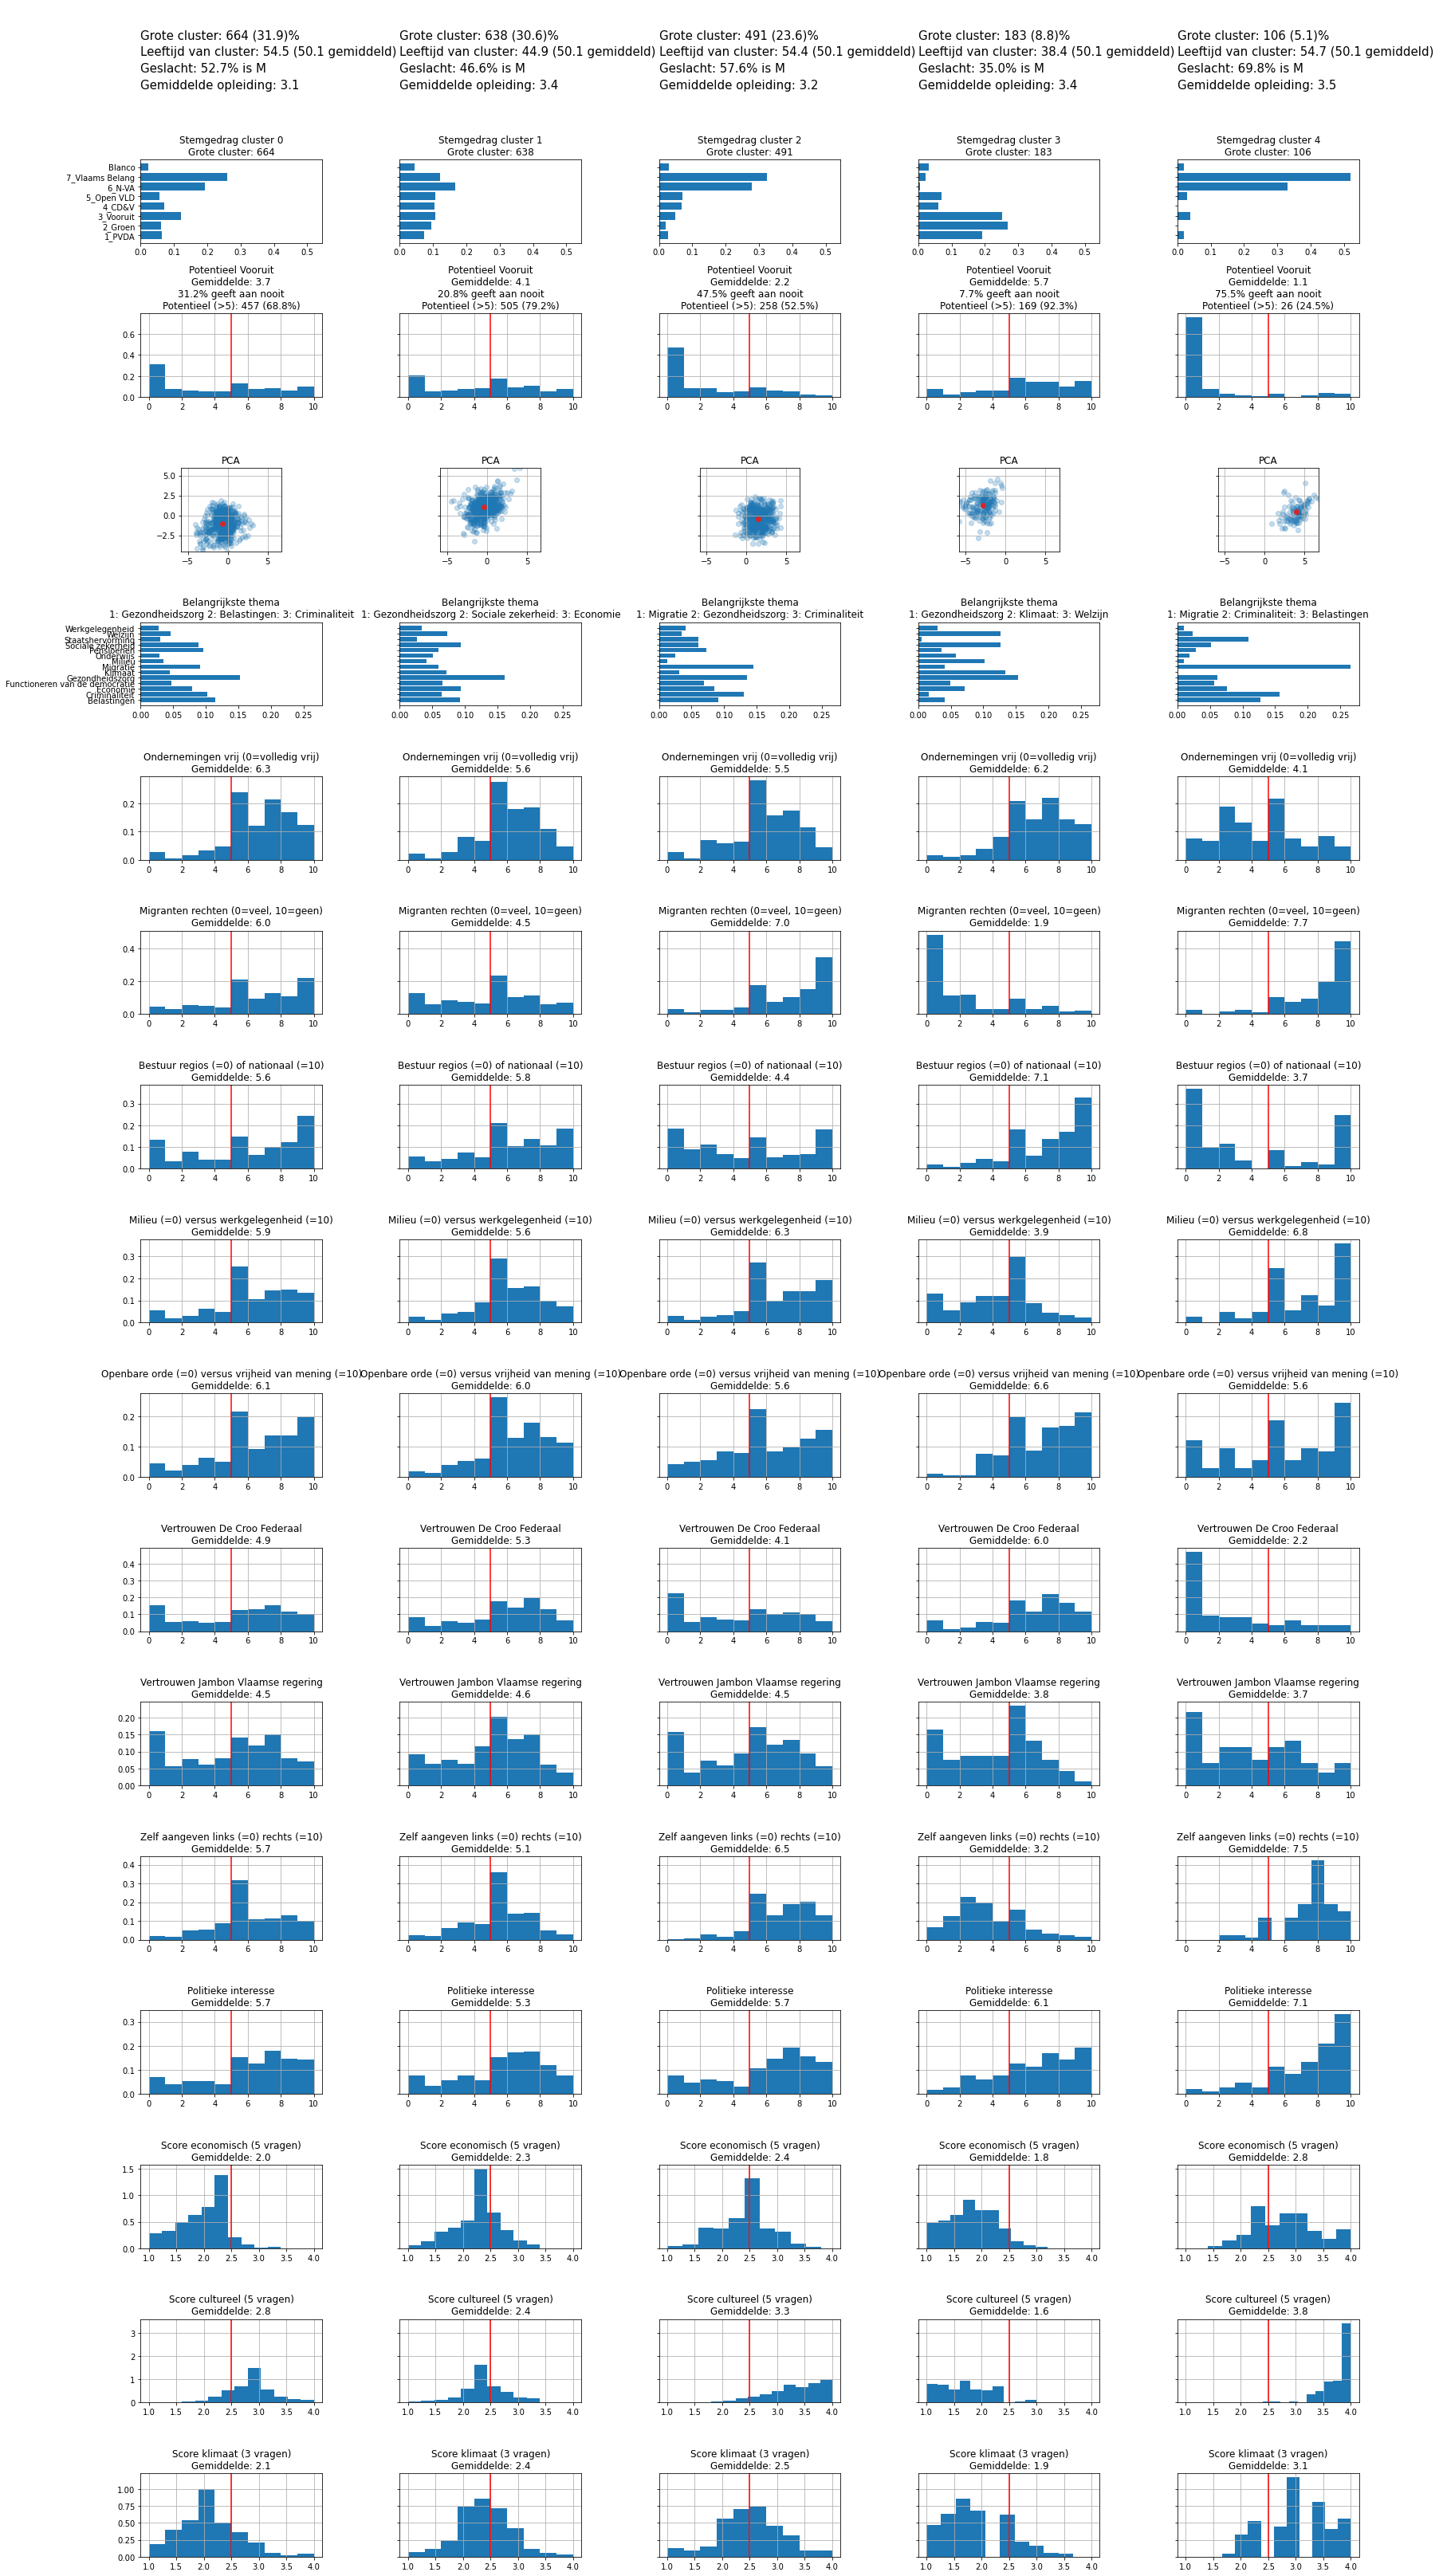

In [419]:
fig, axes = plt.subplots(17, len(np.unique(data_raw['cluster'])), figsize=(25,45), sharex='row', sharey='row')

cluster_data = {
    'demographics':{},
    'voteNow':{},
    'potentieel':{},
    'latentFeatures':{},
    'themas':{},
    'breuklijnvragen':{},
}

for cluster in np.arange(len(np.unique(data_raw['cluster']))):
    
    cluster_subset = data_raw.loc[data_raw['cluster']==cluster,:]
    cluster_data['demographics']['cluster_{}'.format(cluster)] = {}

    # Text only
    axes[0][cluster].text(x=0, y=0.6, s='''Grote cluster: {:.0f} ({:.1f})%'''
                      .format(len(cluster_subset), np.mean(data_raw['cluster']==cluster)*100), size=15)
    cluster_data['demographics']['cluster_{}'.format(cluster)]['clusterSizePercent'] = np.mean(data_raw['cluster']==cluster)*100
    
    axes[0][cluster].text(x=0, y=0.4, s='''Leeftijd van cluster: {:.1f} ({:.1f} gemiddeld)'''
                      .format(cluster_subset['Age'].mean(), data_raw['Age'].mean()), size=15)
    cluster_data['demographics']['cluster_{}'.format(cluster)]['meanAge'] = data_raw['Age'].mean()
    
    axes[0][cluster].text(x=0, y=0.2, s='Geslacht: {:.1f}% is M'.format(
        np.mean(cluster_subset['Gender']=='Man')*100), size=15) 
    cluster_data['demographics']['cluster_{}'.format(cluster)]['percentMale'] = np.mean(cluster_subset['Gender']=='Man')*100
    
    axes[0][cluster].text(x=0,y=0., s='Gemiddelde opleiding: {:.1f}'.format(
        np.mean(cluster_subset['Education'].str[0].astype(int))), size=15)       
    cluster_data['demographics']['cluster_{}'.format(cluster)]['averageEducation'] = np.mean(cluster_subset['Education'].str[0].astype(int))
    
    axes[0][cluster].get_xaxis().set_visible(False)
    axes[0][cluster].get_yaxis().set_visible(False)
    axes[0][cluster].spines['bottom'].set_color('white')
    axes[0][cluster].spines['top'].set_color('white') 
    axes[0][cluster].spines['right'].set_color('white')
    axes[0][cluster].spines['left'].set_color('white')    
    
    # Vote now
    cluster_value_counts_partijen = cluster_subset['VoteChoiceNow'].value_counts(ascending=True, normalize=True).sort_index()
    cluster_data['voteNow']['cluster_{}'.format(cluster)] = cluster_value_counts_partijen.to_dict()
    for partij in np.unique(data_raw['VoteChoiceNow']):
        if(partij not in cluster_value_counts_partijen):
            cluster_value_counts_partijen[partij] = 0
    cluster_value_counts_partijen = cluster_value_counts_partijen.drop(['Andere', 'Ik weet het niet meer', 'Mocht nog niet gaan stemmen', 'Niet gaan stemmen'], errors='ignore')
    cluster_value_counts_partijen = cluster_value_counts_partijen.sort_index()   

    axes[1][cluster].barh(y=np.arange(len(cluster_value_counts_partijen)),
                          tick_label = cluster_value_counts_partijen.index,
                         width=cluster_value_counts_partijen)
    axes[1][cluster].set_title('Stemgedrag cluster {}\nGrote cluster: {}'.format(cluster, len(cluster_subset)))
    
    # Potentieel
    cluster_subset['ElecUtil_VOORUIT'].hist(ax=axes[2][cluster], density=True)
    cluster_data['potentieel']['cluster_{}'.format(cluster)]={}
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelPVDA'] = cluster_subset['ElecUtil_PVDA'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelGroen'] = cluster_subset['ElecUtil_GROEN'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelVooruit'] = cluster_subset['ElecUtil_VOORUIT'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelOpenVLD'] = cluster_subset['ElecUtil_OPENVLD'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelCDV'] = cluster_subset['ElecUtil_CDV'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelNVA'] = cluster_subset['ElecUtil_NVA'].mean()
    cluster_data['potentieel']['cluster_{}'.format(cluster)]['potentieelVlaamsBelang'] = cluster_subset['ElecUtil_VB'].mean()
    
    axes[2][cluster].axvline(x=5,c='red')
    axes[2][cluster].set_title('Potentieel Vooruit\nGemiddelde: {:.1f}\n{:.1f}% geeft aan nooit\nPotentieel (>5): {} ({:.1f}%)'.format(
        cluster_subset['ElecUtil_VOORUIT'].mean(),
        np.mean(cluster_subset['ElecUtil_VOORUIT']==0)*100,
        np.sum(cluster_subset['ElecUtil_VOORUIT']>0),
        np.mean(cluster_subset['ElecUtil_VOORUIT']>0)*100,
    ))      
    
    # Latent features
    axes[3][cluster].scatter(cluster_subset['pca_0'], cluster_subset['pca_1'], alpha=0.25)
    axes[3][cluster].scatter(cluster_subset['pca_0'].mean(), cluster_subset['pca_1'].mean(), c='C3')
    axes[3][cluster].set_xlim(np.min(data_raw['pca_0']), np.max(data_raw['pca_0']))
    axes[3][cluster].set_ylim(np.min(data_raw['pca_1']), np.max(data_raw['pca_1']))    
    axes[3][cluster].set_title('PCA')
    axes[3][cluster].grid()
    axes[3][cluster].set_aspect('equal')
    cluster_data['latentFeatures']['cluster_{}'.format(cluster)]={}
    cluster_data['latentFeatures']['cluster_{}'.format(cluster)]['latentFeature0'] = cluster_subset['pca_0'].mean()
    cluster_data['latentFeatures']['cluster_{}'.format(cluster)]['latentFeature1'] = cluster_subset['pca_1'].mean()    
    
    # Belangrijkste thema
    most_important_thema = cluster_subset['MIP_Closed_1'].append(cluster_subset['MIP_Closed_2']).value_counts(normalize=True)
    for thema in np.unique(data_raw['MIP_Closed_1']):
        if thema not in most_important_thema:
            most_important_thema[thema]=0
    most_important_thema = most_important_thema.drop(['Mobiliteit', 'Defensie'], errors='ignore') # Niemand duidt dit aan, maakt de grafiek alleen maar onoverzichtelijk
    most_important_thema = most_important_thema.sort_index()
    
    axes[4][cluster].barh(y=np.arange(len(most_important_thema)), width=most_important_thema, 
                          tick_label=most_important_thema.index)
    axes[4][cluster].set_title('Belangrijkste thema\n1: {} 2: {}: 3: {}'.format(most_important_thema.sort_values(ascending=False).index[0],
                                                                            most_important_thema.sort_values(ascending=False).index[1],
                                                                            most_important_thema.sort_values(ascending=False).index[2]))
    cluster_data['themas']['cluster_{}'.format(cluster)]={}
    cluster_data['themas']['cluster_{}'.format(cluster)] = most_important_thema.to_dict()
    
    
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]={}
    
    # Ondernemningen vrij
    cluster_subset['EconRegul_Self'].hist(ax=axes[5][cluster], density=True)
    axes[5][cluster].axvline(x=5,c='red')
    axes[5][cluster].set_title('Ondernemingen vrij (0=volledig vrij)\nGemiddelde: {:.1f}'.format(cluster_subset['EconRegul_Self'].mean()))
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['ondernemingenVrij'] = cluster_subset['EconRegul_Self'].mean()
    
    # Migranten rechten
    cluster_subset['Immi_Self'].hist(ax=axes[6][cluster], density=True)
    axes[6][cluster].axvline(x=5,c='red')
    axes[6][cluster].set_title('Migranten rechten (0=veel, 10=geen)\nGemiddelde: {:.1f}'.format(cluster_subset['Immi_Self'].mean())) 
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['migrantenRechten'] = cluster_subset['Immi_Self'].mean()
    
    # Freedom of speech
    cluster_subset['StateReform_Self'].hist(ax=axes[7][cluster], density=True)
    axes[7][cluster].axvline(x=5,c='red')
    axes[7][cluster].set_title('Bestuur regios (=0) of nationaal (=10)\nGemiddelde: {:.1f}'.format(cluster_subset['StateReform_Self'].mean()))       
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['bestuurRegionaalVsNationaal'] = cluster_subset['StateReform_Self'].mean()
    
    # Milieu versus werk
    cluster_subset['EnviEcon_Self'].hist(ax=axes[8][cluster], density=True)
    axes[8][cluster].axvline(x=5,c='red')
    axes[8][cluster].set_title('Milieu (=0) versus werkgelegenheid (=10)\nGemiddelde: {:.1f}'.format(cluster_subset['EnviEcon_Self'].mean()))     
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['milieuVsWerk'] = cluster_subset['EnviEcon_Self'].mean()
    
    # Freedom of speech
    cluster_subset['FreedomSpeech_Self'].hist(ax=axes[9][cluster], density=True)
    axes[9][cluster].axvline(x=5,c='red')
    axes[9][cluster].set_title('Openbare orde (=0) versus vrijheid van mening (=10)\nGemiddelde: {:.1f}'.format(cluster_subset['FreedomSpeech_Self'].mean()))   
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['vrijeMeningsUiting'] = cluster_subset['FreedomSpeech_Self'].mean()
    
    # Vertrouwen De Croo
    cluster_subset['Eval_Gov_1'].hist(ax=axes[10][cluster], density=True)
    axes[10][cluster].axvline(x=5,c='red')
    axes[10][cluster].set_title('Vertrouwen De Croo Federaal\nGemiddelde: {:.1f}'.format(cluster_subset['Eval_Gov_1'].mean()))  
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['vertrouwenDeCroo'] = cluster_subset['Eval_Gov_1'].mean()
    
    # Vertrouwen Janbon
    cluster_subset['Eval_Gov_2'].hist(ax=axes[11][cluster], density=True)
    axes[11][cluster].axvline(x=5,c='red')
    axes[11][cluster].set_title('Vertrouwen Jambon Vlaamse regering\nGemiddelde: {:.1f}'.format(cluster_subset['Eval_Gov_2'].mean()))      
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['vertrouwenJambon'] = cluster_subset['Eval_Gov_1'].mean()
    
    # Links rechts
    cluster_subset['LeftRight'].hist(ax=axes[12][cluster], density=True)
    axes[12][cluster].axvline(x=5,c='red')
    axes[12][cluster].set_title('Zelf aangeven links (=0) rechts (=10)\nGemiddelde: {:.1f}'.format(cluster_subset['LeftRight'].mean()))  
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['linksRechts'] = cluster_subset['Eval_Gov_1'].mean()
    
    # Politieke interesse
    cluster_subset['Polinterest'].hist(ax=axes[13][cluster], density=True)
    axes[13][cluster].axvline(x=5,c='red')
    axes[13][cluster].set_title('Politieke interesse\nGemiddelde: {:.1f}'.format(cluster_subset['Polinterest'].mean()))      
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['politiekeInteresse'] = cluster_subset['Eval_Gov_1'].mean()
    
    # score_economisch_vooruit
    cluster_subset['score_economisch_vooruit'].hist(ax=axes[14][cluster], density=True)
    axes[14][cluster].axvline(x=2.5,c='red')
    axes[14][cluster].set_title('Score economisch (5 vragen)\nGemiddelde: {:.1f}'.format(cluster_subset['score_economisch_vooruit'].mean()))    
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['scoreEconomische5Vragen'] = cluster_subset['score_economisch_vooruit'].mean()
    
    # score_cultureel_vooruit
    cluster_subset['score_cultureel_vooruit'].hist(ax=axes[15][cluster], density=True)
    axes[15][cluster].axvline(x=2.5,c='red')
    axes[15][cluster].set_title('Score cultureel (5 vragen)\nGemiddelde: {:.1f}'.format(cluster_subset['score_cultureel_vooruit'].mean()))   
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['scoreCulturele5Vragen'] = cluster_subset['score_economisch_vooruit'].mean()
    
    # score_klimaat_vooruit
    cluster_subset['score_klimaat_vooruit'].hist(ax=axes[16][cluster], density=True)
    axes[16][cluster].axvline(x=2.5,c='red')
    axes[16][cluster].set_title('Score klimaat (3 vragen)\nGemiddelde: {:.1f}'.format(cluster_subset['score_klimaat_vooruit'].mean()))       
    cluster_data['breuklijnvragen']['cluster_{}'.format(cluster)]['scoreKlimaat3Vragen'] = cluster_subset['score_klimaat_vooruit'].mean()
    
fig.tight_layout()

In [424]:
#with pd.ExcelWriter('2021-09-31 Export analyse De Stemming.xlsx') as writer:  
#    pd.DataFrame(cluster_data['demographics']).to_excel(writer, sheet_name='Demographics')
#    pd.DataFrame(cluster_data['voteNow']).to_excel(writer, sheet_name='Stem Vandaag')
#    pd.DataFrame(cluster_data['potentieel']).to_excel(writer, sheet_name='Potentieel partijen')
#    pd.DataFrame(cluster_data['latentFeatures']).to_excel(writer, sheet_name='Potentieel partijen')
#    pd.DataFrame(cluster_data['themas']).to_excel(writer, sheet_name='Belangrijkste themas')
#    pd.DataFrame(cluster_data['breuklijnvragen']).to_excel(writer, sheet_name='Breuklijnvragen')

## Selecteer partij en definitie van potentieel

In [375]:
cutof_boundry=0
def set_cutof_boundry(x):
    print('Cutof potenteel set at {}+'.format(x))
    return x

slider = interactive(set_cutof_boundry, x=(1,10,1))

print('Selecteer definitie van potentieel')
display(slider)


Selecteer definitie van potentieel


interactive(children=(IntSlider(value=5, description='x', max=10, min=1), Output()), _dom_classes=('widget-int…

In [376]:
partij_radio_buttons = widgets.RadioButtons(
    options=['1_PVDA','2_Groen', '3_Vooruit', '4_CD&V', '5_Open VLD', '6_N-VA', '7_Vlaams Belang'],
    description='Selecteer de partij: ',
    disabled=False
)
display(partij_radio_buttons)

RadioButtons(description='Selecteer de partij: ', options=('1_PVDA', '2_Groen', '3_Vooruit', '4_CD&V', '5_Open…

## Dynamische data selectie op basis van bovenstaande input

In [377]:
geselecteerde_partij = partij_radio_buttons.value

correct_column_name_dict = {
    '1_PVDA':'ElecUtil_PVDA',
    '2_Groen':'ElecUtil_GROEN',
    '3_Vooruit':'ElecUtil_VOORUIT',
    '4_CD&V':'ElecUtil_CDV',
    '5_Open VLD':'ElecUtil_OPENVLD',
    '6_N-VA':'ElecUtil_NVA',
    '7_Vlaams Belang':'ElecUtil_VB',
}
correct_column_name_potentieel = correct_column_name_dict[geselecteerde_partij]

row_mask = (data_raw['VoteChoiceNow']!=partij_radio_buttons.value) & (data_raw[correct_column_name_potentieel]>=slider.result)
print('''{:.1f}% van de respondenten stemt potentieel op {} (score {}+),  maar stemt er vandaag niet op'''
          .format( np.mean(row_mask)*100, partij_radio_buttons.value, slider.result))
potentieel = data_raw.loc[row_mask,:].copy()  

row_mask = data_raw['VoteChoiceNow']==partij_radio_buttons.value
kiezers = data_raw.loc[row_mask,:]
print('''{:.1f}% van de respondenten stemt vandaag op {}'''
          .format( np.mean(row_mask)*100, partij_radio_buttons.value))


32.3% van de respondenten stemt potentieel op 3_Vooruit (score 5+),  maar stemt er vandaag niet op
10.7% van de respondenten stemt vandaag op 3_Vooruit


## Het potentieel van de partij versus alle respondenten

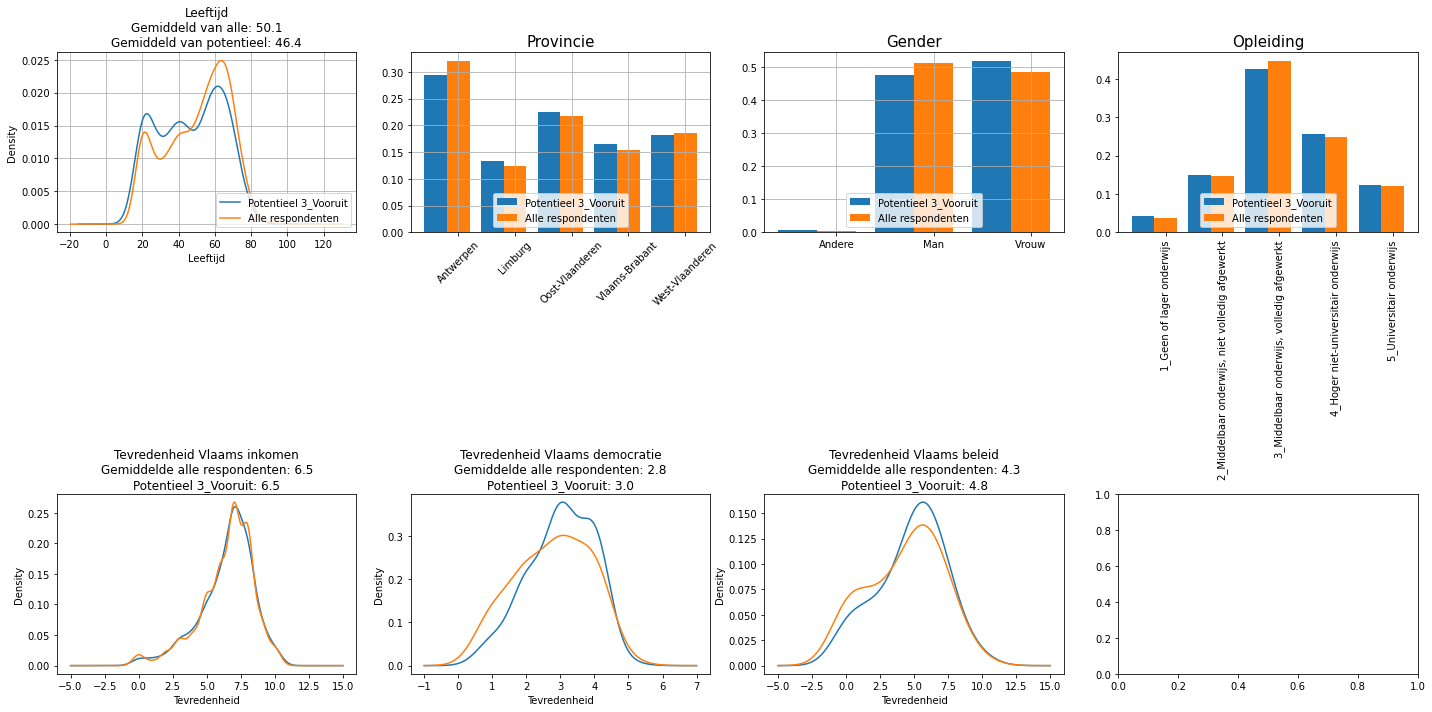

In [378]:
## Alle respondenten versus het potentieel van een partij

# Demographics
fig, axes = plt.subplots(2,4,figsize=(20,10))

# Age
potentieel['Age'].plot.kde(ax=axes[0][0], label='Potentieel {}'.format(geselecteerde_partij))
data_raw['Age'].plot.kde(ax=axes[0][0], label='Alle respondenten')
axes[0][0].set_title('''Leeftijd\nGemiddeld van alle: {:.1f}\nGemiddeld van potentieel: {:.1f}'''
                  .format(data_raw['Age'].mean(), potentieel['Age'].mean()), size=12)
axes[0][0].legend(loc='lower right')
axes[0][0].set_xlabel('Leeftijd')
axes[0][0].grid()

# Provincie
potentieel_provincie = potentieel['Provincie'].value_counts(normalize=True).sort_index()
axes[0][1].bar(x=np.arange(5)-0.2, height=potentieel_provincie, tick_label=potentieel_provincie.index, 
            width=0.4, label='Potentieel {}'.format(geselecteerde_partij))
axes[0][1].tick_params(axis='x', labelrotation=45 )
all_respondents_provincie = data_raw['Provincie'].value_counts(normalize=True).sort_index()
axes[0][1].bar(x=np.arange(5)+0.2, height=all_respondents_provincie, tick_label=all_respondents_provincie.index, 
            width=0.4, label='Alle respondenten')
axes[0][1].tick_params(axis='x', labelrotation=45 )
axes[0][1].set_title('Provincie', size=15)
axes[0][1].legend(loc='lower center')
axes[0][1].grid()

# Geslacht
potentieel_geslacht = potentieel['Gender'].value_counts(normalize=True).sort_index()
potentieel_geslacht['Andere'] = potentieel_geslacht['Andere'] if 'Andere' in potentieel_geslacht.index else 0
potentieel_geslacht = potentieel_geslacht.sort_index()

axes[0][2].bar(tick_label = potentieel_geslacht.index, x=np.arange(3)-0.2, height=potentieel_geslacht.values,
           width=0.4, label='Potentieel {}'.format(geselecteerde_partij))
all_respondents_geslacht = data_raw['Gender'].value_counts(normalize=True).sort_index()

axes[0][2].bar(tick_label = all_respondents_geslacht.index, x=np.arange(3)+0.2, height=all_respondents_geslacht.values,
           width=0.4, label='Alle respondenten')
axes[0][2].grid()
axes[0][2].set_title('Gender', size=15)
axes[0][2].legend(loc='lower center')

# Opleiding
potentieel_opleiding = potentieel['Education'].value_counts(normalize=True).sort_index()
axes[0][3].bar(x=np.arange(5)-0.2, tick_label=potentieel_opleiding.index, height=potentieel_opleiding,
            label='Potentieel {}'.format(geselecteerde_partij), width=0.4)
all_respondents_opleiding = data_raw['Education'].value_counts(normalize=True).sort_index()
axes[0][3].bar(x=np.arange(5)+0.2, tick_label=all_respondents_opleiding.index, height=all_respondents_opleiding, 
            label='Alle respondenten', width=0.4)
axes[0][3].tick_params(axis='x', labelrotation=90 )
axes[0][3].set_title('Opleiding', size=15)
axes[0][3].legend(loc='lower center')

# Tevredenheid inkomen
potentieel['Satis_Income'].plot.kde(ax=axes[1][0], label='Kiezers {}'.format(geselecteerde_partij))
data_raw['Satis_Income'].plot.kde(ax=axes[1][0], label='Alle respondenten')
axes[1][0].set_title('Tevredenheid Vlaams inkomen\nGemiddelde alle respondenten: {:.1f}\nPotentieel {}: {:.1f}'
                     .format(np.mean(data_raw['Satis_Income']), 
                             geselecteerde_partij,
                             np.mean(potentieel['Satis_Income'])), size=12)
axes[1][0].set_xlabel('Tevredenheid')

# Tevredenheid democratie
potentieel['SatisDem'].plot.kde(ax=axes[1][1], label='Kiezers {}'.format(geselecteerde_partij), bw_method=0.5)
data_raw['SatisDem'].plot.kde(ax=axes[1][1], label='Alle respondenten', bw_method=0.5 )
axes[1][1].set_title('Tevredenheid Vlaams democratie\nGemiddelde alle respondenten: {:.1f}\nPotentieel {}: {:.1f}'
                     .format(np.mean(data_raw['SatisDem']), 
                             geselecteerde_partij,
                             np.mean(potentieel['SatisDem'])), size=12)
axes[1][1].set_xlabel('Tevredenheid')

# Tevredenheid Vlaams beleid
potentieel['PolicyEval_FLEMISH'].plot.kde(ax=axes[1][2], label='Kiezers {}'.format(geselecteerde_partij), bw_method=0.5)
data_raw['PolicyEval_FLEMISH'].plot.kde(ax=axes[1][2], label='Alle respondenten', bw_method=0.5 )
axes[1][2].set_title('Tevredenheid Vlaams beleid\nGemiddelde alle respondenten: {:.1f}\nPotentieel {}: {:.1f}'
                     .format(np.mean(data_raw['PolicyEval_FLEMISH']), 
                             geselecteerde_partij,
                             np.mean(potentieel['PolicyEval_FLEMISH'])), size=12)
axes[1][2].set_xlabel('Tevredenheid')

fig.tight_layout()

## De kiezers van de geselecteerde partij versus alle respondenten

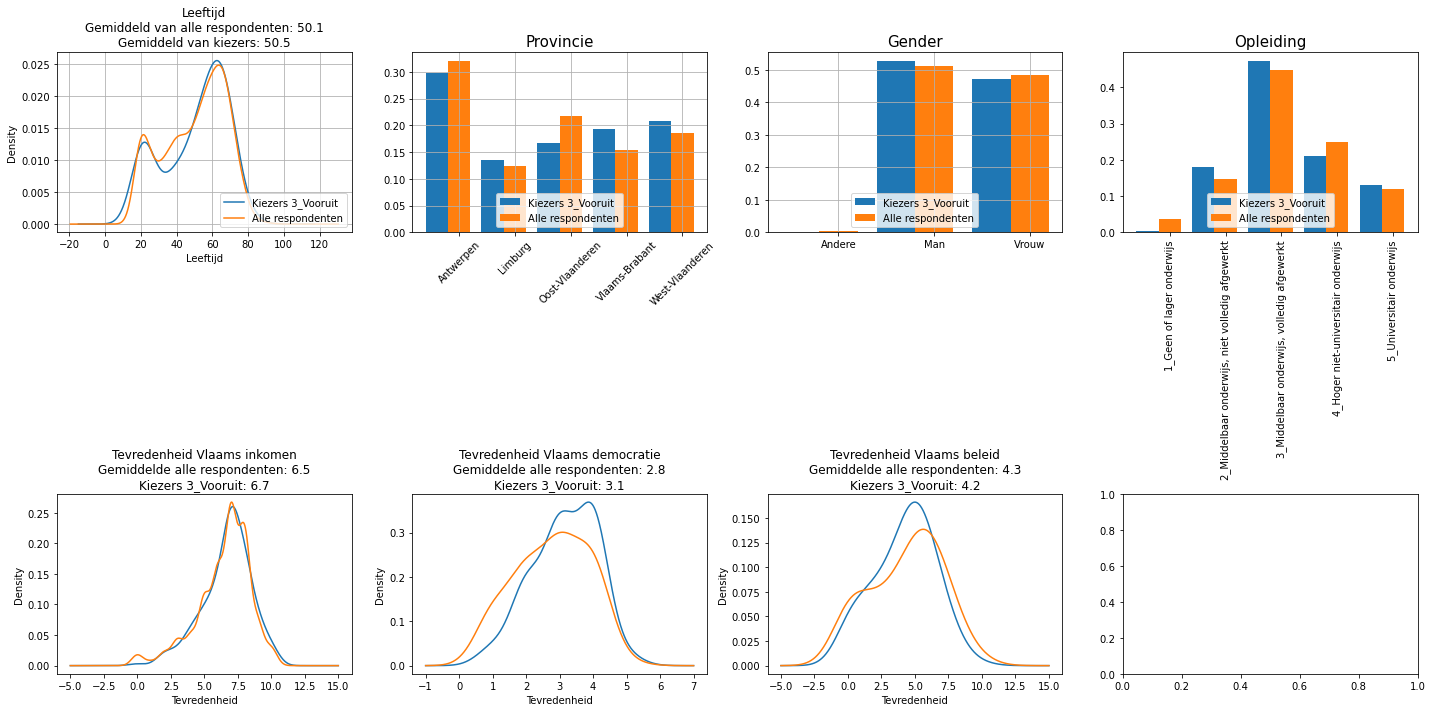

In [379]:
# Demographics
fig, axes = plt.subplots(2,4,figsize=(20,10))

# Age
kiezers['Age'].plot.kde(ax=axes[0][0], label='Kiezers {}'.format(geselecteerde_partij))
data_raw['Age'].plot.kde(ax=axes[0][0], label='Alle respondenten')
axes[0][0].set_title('''Leeftijd\nGemiddeld van alle respondenten: {:.1f}\nGemiddeld van kiezers: {:.1f}'''
                  .format(data_raw['Age'].mean(), kiezers['Age'].mean()), size=12)
axes[0][0].legend(loc='lower right')
axes[0][0].set_xlabel('Leeftijd')
axes[0][0].grid()

# Provincie
kiezers_provincie = kiezers['Provincie'].value_counts(normalize=True).sort_index()
axes[0][1].bar(x=np.arange(5)-0.2, height=kiezers_provincie, tick_label=kiezers_provincie.index, 
            width=0.4, label='Kiezers {}'.format(geselecteerde_partij))
axes[0][1].tick_params(axis='x', labelrotation=45 )
all_respondents_provincie = data_raw['Provincie'].value_counts(normalize=True).sort_index()
axes[0][1].bar(x=np.arange(5)+0.2, height=all_respondents_provincie, tick_label=all_respondents_provincie.index, 
            width=0.4, label='Alle respondenten')
axes[0][1].tick_params(axis='x', labelrotation=45 )
axes[0][1].set_title('Provincie', size=15)
axes[0][1].legend(loc='lower center')
axes[0][1].grid()

# Geslacht
kiezers_geslacht = kiezers['Gender'].value_counts(normalize=True).sort_index()
kiezers_geslacht['Andere'] = kiezers_geslacht['Andere'] if 'Andere' in kiezers_geslacht.index else 0
kiezers_geslacht = kiezers_geslacht.sort_index()

axes[0][2].bar(tick_label = kiezers_geslacht.index, x=np.arange(3)-0.2, height=kiezers_geslacht.values,
           width=0.4, label='Kiezers {}'.format(geselecteerde_partij))
all_respondents_geslacht = data_raw['Gender'].value_counts(normalize=True).sort_index()

axes[0][2].bar(tick_label = all_respondents_geslacht.index, x=np.arange(3)+0.2, height=all_respondents_geslacht.values,
           width=0.4, label='Alle respondenten')
axes[0][2].grid()
axes[0][2].set_title('Gender', size=15)
axes[0][2].legend(loc='lower center')

# Opleiding
kiezers_opleiding = kiezers['Education'].value_counts(normalize=True).sort_index()
axes[0][3].bar(x=np.arange(5)-0.2, tick_label=kiezers_opleiding.index, height=kiezers_opleiding,
            label='Kiezers {}'.format(geselecteerde_partij), width=0.4)
all_respondents_opleiding = data_raw['Education'].value_counts(normalize=True).sort_index()
axes[0][3].bar(x=np.arange(5)+0.2, tick_label=all_respondents_opleiding.index, height=all_respondents_opleiding, 
            label='Alle respondenten', width=0.4)
axes[0][3].tick_params(axis='x', labelrotation=90 )
axes[0][3].set_title('Opleiding', size=15)
axes[0][3].legend(loc='lower center')



# Tevredenheid inkomen
kiezers['Satis_Income'].plot.kde(ax=axes[1][0], label='Kiezers {}'.format(geselecteerde_partij))
data_raw['Satis_Income'].plot.kde(ax=axes[1][0], label='Alle respondenten')
axes[1][0].set_title('Tevredenheid Vlaams inkomen\nGemiddelde alle respondenten: {:.1f}\nKiezers {}: {:.1f}'
                     .format(np.mean(data_raw['Satis_Income']), 
                             geselecteerde_partij,
                             np.mean(kiezers['Satis_Income'])), size=12)
axes[1][0].set_xlabel('Tevredenheid')

# Tevredenheid democratie
kiezers['SatisDem'].plot.kde(ax=axes[1][1], label='Kiezers {}'.format(geselecteerde_partij), bw_method=0.5)
data_raw['SatisDem'].plot.kde(ax=axes[1][1], label='Alle respondenten', bw_method=0.5 )
axes[1][1].set_title('Tevredenheid Vlaams democratie\nGemiddelde alle respondenten: {:.1f}\nKiezers {}: {:.1f}'
                     .format(np.mean(data_raw['SatisDem']), 
                             geselecteerde_partij,
                             np.mean(kiezers['SatisDem'])), size=12)
axes[1][1].set_xlabel('Tevredenheid')

# Tevredenheid Vlaams beleid
kiezers['PolicyEval_FLEMISH'].plot.kde(ax=axes[1][2], label='Kiezers {}'.format(geselecteerde_partij), bw_method=0.5)
data_raw['PolicyEval_FLEMISH'].plot.kde(ax=axes[1][2], label='Alle respondenten', bw_method=0.5 )
axes[1][2].set_title('Tevredenheid Vlaams beleid\nGemiddelde alle respondenten: {:.1f}\nKiezers {}: {:.1f}'
                     .format(np.mean(data_raw['PolicyEval_FLEMISH']), 
                             geselecteerde_partij,
                             np.mean(kiezers['PolicyEval_FLEMISH'])), size=12)
axes[1][2].set_xlabel('Tevredenheid')

fig.tight_layout()

Text(0, 0.5, 'Percent')

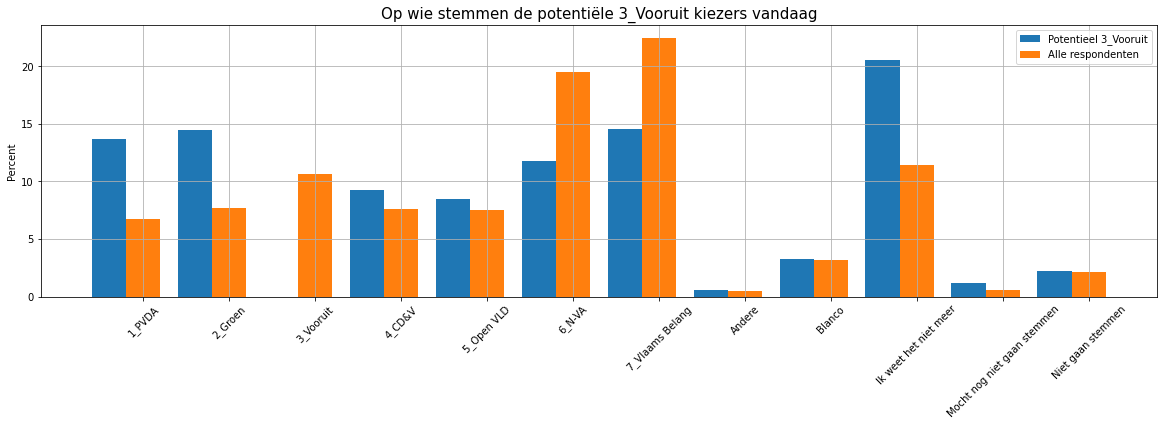

In [380]:
# Op wie stemt het potentieel vandaag
potentieel_stemvandaag = potentieel['VoteChoiceNow'].value_counts(normalize=True).sort_index()*100
potentieel_stemvandaag[geselecteerde_partij]=0
potentieel_stemvandaag = potentieel_stemvandaag.sort_index()

all_respondents_stemvandaag = data_raw['VoteChoiceNow'].value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.bar(tick_label=potentieel_stemvandaag.index, height=potentieel_stemvandaag, 
            x=np.arange(len(potentieel_stemvandaag))-0.2, width=0.4, label='Potentieel {}'.format(geselecteerde_partij))
ax.bar(tick_label=all_respondents_stemvandaag.index, height=all_respondents_stemvandaag, 
            x=np.arange(len(all_respondents_stemvandaag))+0.2, width=0.4, label='Alle respondenten')

ax.tick_params(axis='x', labelrotation=45)
ax.grid()
ax.legend()
ax.set_title('Op wie stemmen de potentiële {} kiezers vandaag'.format(geselecteerde_partij), size=15)
ax.set_ylabel('Percent')

## Belangrijkste themas voor het potentieel en de kiezers van Vooruit

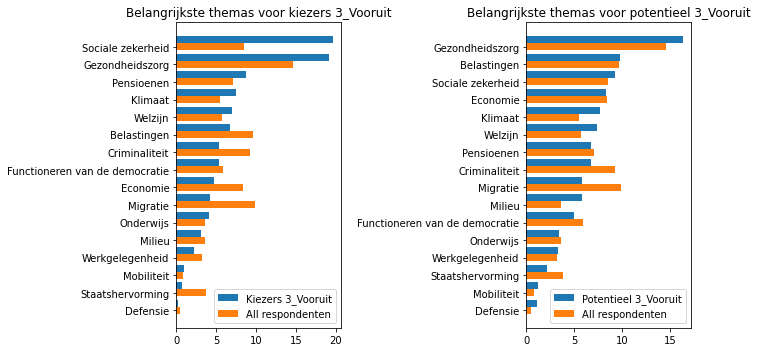

In [381]:
themas_all = (data_raw['MIP_Closed_1'].append(data_raw['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
themas_potentieel = (potentieel['MIP_Closed_1'].append(potentieel['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
themas_kiezers = (kiezers['MIP_Closed_1'].append(kiezers['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100

themas = pd.concat([themas_all, themas_potentieel, themas_kiezers], axis=1)
themas.columns = ['all', 'potentieel', 'kiezers']


fig, axes = plt.subplots(1,2,figsize=(10,5))

themas = themas.sort_values('kiezers')
axes[0].barh(y = np.arange(len(themas))+0.2, width=themas['kiezers'], tick_label=themas.index, 
             height=0.4, label='Kiezers {}'.format(geselecteerde_partij))
axes[0].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, 
             height=0.4, label='All respondenten')  
axes[0].legend()
axes[0].set_title('Belangrijkste themas voor kiezers {}'.format(geselecteerde_partij))

themas = themas.sort_values('potentieel')
axes[1].barh(y = np.arange(len(themas))+0.2, width=themas['potentieel'], tick_label=themas.index, 
             height=0.4, label='Potentieel {}'.format(geselecteerde_partij))
axes[1].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, 
             height=0.4, label='All respondenten')  
axes[1].legend()
axes[1].set_title('Belangrijkste themas voor potentieel {}'.format(geselecteerde_partij))

fig.tight_layout()

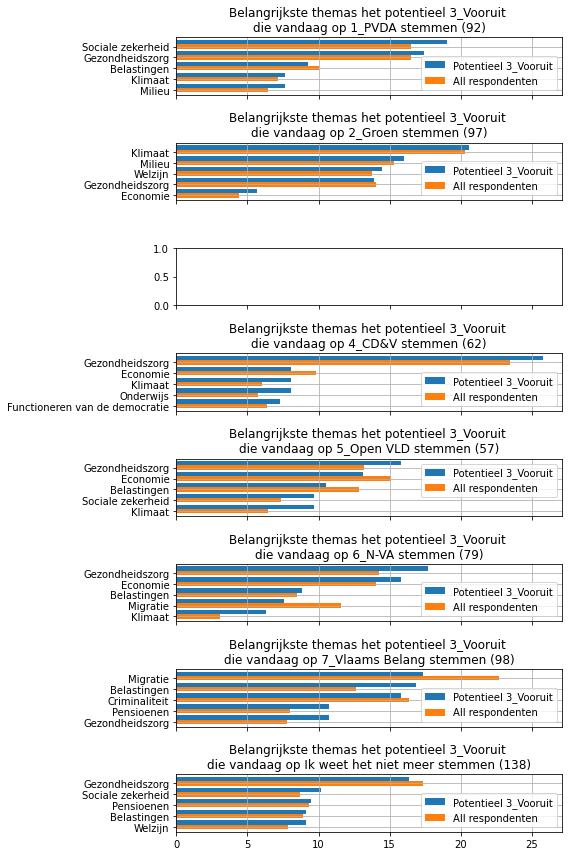

In [382]:
# Aanval: potentieel
fig, axes = plt.subplots(8,1,figsize=(8,12), sharex=True)

for i, partij in enumerate(['1_PVDA', '2_Groen','3_Vooruit', '4_CD&V', '5_Open VLD', '6_N-VA', '7_Vlaams Belang', 'Ik weet het niet meer']):

    if(partij == geselecteerde_partij): continue
        
    row_mask = data_raw['VoteChoiceNow']==partij
    subset = data_raw.loc[row_mask,:]
    themas_all = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    row_mask = potentieel['VoteChoiceNow']==partij
    subset = potentieel.loc[row_mask,:]
    themas_potentieel = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    themas = pd.concat([themas_all, themas_potentieel], axis=1)
    themas.columns = ['all', 'potentieel']
    themas = themas.sort_values('potentieel', ascending=False).head(5).sort_values(by='potentieel')

    axes[i].barh(y = np.arange(len(themas))+0.2, width=themas['potentieel'], tick_label=themas.index, 
                 height=0.4, label='Potentieel {}'.format(geselecteerde_partij))
    axes[i].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, 
                 height=0.4, label='All respondenten')    
    
    axes[i].set_title('Belangrijkste themas het potentieel {} \ndie vandaag op {} stemmen ({})'.format(geselecteerde_partij, partij, len(subset)))
    axes[i].legend()
    axes[i].grid()
    fig.tight_layout()

Text(0.5, 1.0, 'Hoeveel % zou ooit op 3_Vooruit kunnen stemmen \n(Potentiëel score>0)')

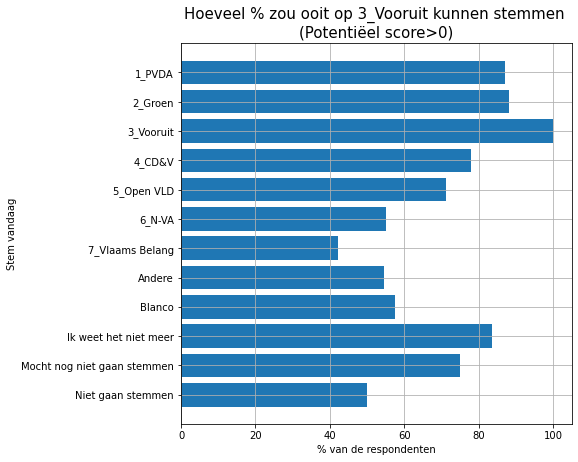

In [383]:
correct_column_name_dict = {
    '1_PVDA':'ElecUtil_PVDA',
    '2_Groen':'ElecUtil_GROEN',
    '3_Vooruit':'ElecUtil_VOORUIT',
    '4_CD&V':'ElecUtil_CDV',
    '5_Open VLD':'ElecUtil_OPENVLD',
    '6_N-VA':'ElecUtil_NVA',
    '7_Vlaams Belang':'ElecUtil_VB',
}
correct_column_name = correct_column_name_dict[geselecteerde_partij]

percent_not_zero_potential = data_raw.groupby('VoteChoiceNow')[correct_column_name].apply(lambda x: np.mean(x>0)*100)
percent_not_zero_potential = percent_not_zero_potential.sort_index(ascending=False)

fig, ax = plt.subplots(1,1,figsize=(7,7))

ax.barh(tick_label = percent_not_zero_potential.index, 
        width=percent_not_zero_potential.values, 
        y=np.arange(len(percent_not_zero_potential)))
ax.grid()
ax.set_ylabel('Stem vandaag')
ax.set_xlabel('% van de respondenten')
ax.set_title('Hoeveel % zou ooit op {} kunnen stemmen \n(Potentiëel score>0)'.format(geselecteerde_partij), size=15)

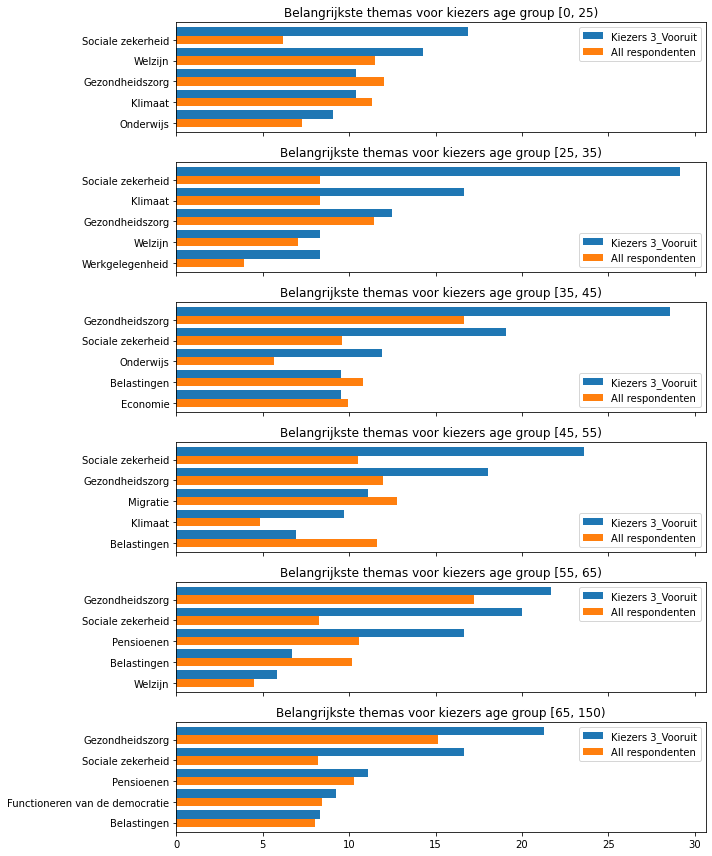

In [384]:
fig, axes = plt.subplots(6,1,figsize=(10,12), sharex=True)

for i, age_group in enumerate(np.unique(potentieel['Age_group'])):
    
    row_mask = data_raw['Age_group']==age_group
    subset = data_raw.loc[row_mask,:]
    themas_all = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    row_mask = kiezers['Age_group']==age_group
    subset = kiezers.loc[row_mask,:]
    themas_vooruit = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values()*100
    
    themas = pd.concat([themas_all, themas_vooruit], axis=1)
    themas.columns = ['all', 'kiezers']
    themas = themas.sort_values('kiezers', ascending=False).head(5).sort_values(by='kiezers')
    
    axes[i].barh(y = np.arange(len(themas))+0.2, width=themas['kiezers'], tick_label=themas.index, height=0.4,
                 label='Kiezers {}'.format(geselecteerde_partij))
    axes[i].barh(y = np.arange(len(themas))-0.2, width=themas['all'], tick_label=themas.index, height=0.4, label='All respondenten')    
    
    axes[i].set_title('Belangrijkste themas voor kiezers age group {}'.format(age_group))
    axes[i].legend()
    fig.tight_layout()    
    
fig.tight_layout()    

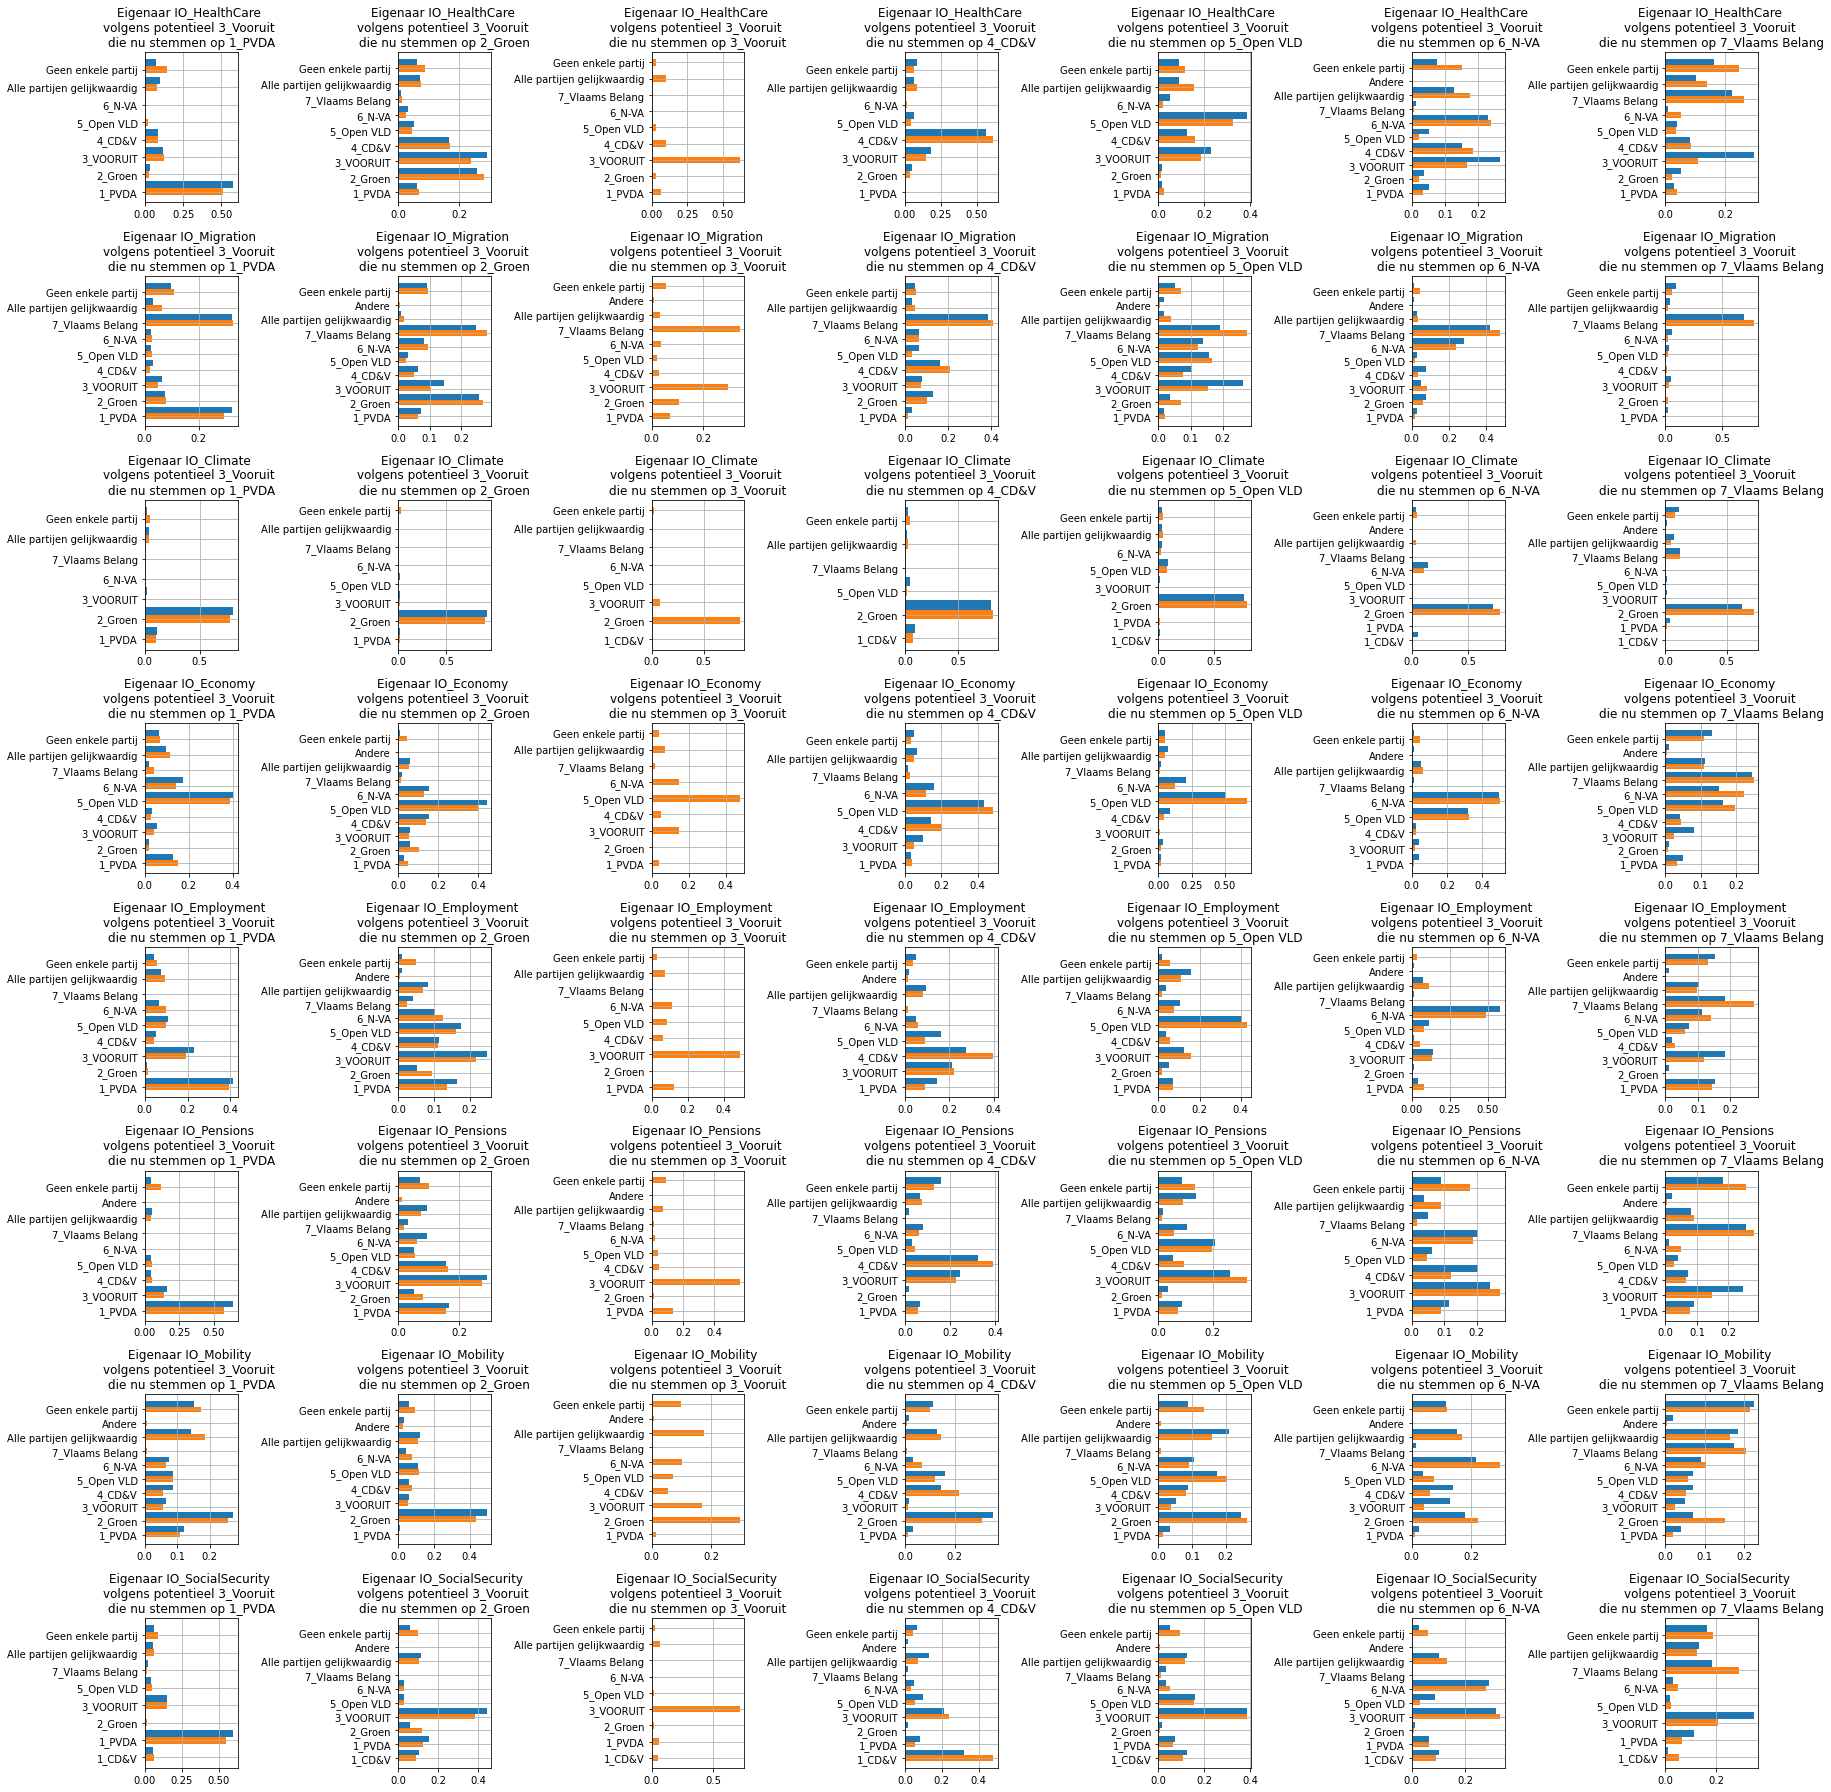

In [385]:
# eigenaar themas
themas = ['IO_HealthCare', 'IO_Migration', 'IO_Climate', 'IO_Economy', 'IO_Employment', 'IO_Pensions', 
          'IO_Mobility', 'IO_SocialSecurity']

fig, axes = plt.subplots(len(themas), 7, figsize=(25, 25))
    
for i, thema in enumerate(themas):
    
    for j, partij_vandaag in enumerate(['1_PVDA', '2_Groen', '3_Vooruit', '4_CD&V', '5_Open VLD', '6_N-VA', '7_Vlaams Belang']):
    
        subset_potentieel_partij = potentieel.loc[(potentieel['VoteChoiceNow']==partij_vandaag),:]
        subset_alle_partij = data_raw.loc[(data_raw['VoteChoiceNow']==partij_vandaag),:]
        
        potentieel_grouped_per_partij = subset_potentieel_partij[thema].value_counts(normalize=True)
        all_respondenten_grouped_per_partij = subset_alle_partij[thema].value_counts(normalize=True)
        grouped_per_partij = pd.concat([potentieel_grouped_per_partij, all_respondenten_grouped_per_partij], axis=1)
        grouped_per_partij.columns=['Potentieel', 'All']
        #grouped_per_partij.loc['Andere',:] = grouped_per_partij.loc['Andere',:].fillna(0)
        grouped_per_partij = grouped_per_partij.sort_index()

        axes[i][j].barh(y=np.arange(len(grouped_per_partij.index))+0.2, 
                     width=grouped_per_partij['Potentieel'].values, tick_label=grouped_per_partij.index, 
                     label='Potentiëel {}'.format(geselecteerde_partij), height=0.4)        

        axes[i][j].barh(y=np.arange(len(grouped_per_partij.index))-0.2, 
                     width=grouped_per_partij['All'], tick_label=grouped_per_partij.index,
                    label='Alle respondenten', height=0.4)    

        axes[i][j].set_title('Eigenaar {} \nvolgens potentieel {} \ndie nu stemmen op {}'.format(thema, geselecteerde_partij, partij_vandaag))
        #axes[i][j].legend()
        axes[i][j].grid()
    
fig.tight_layout()

## Potentieel verlies

Huidige kiezers die op iemand anders zouden stemmen

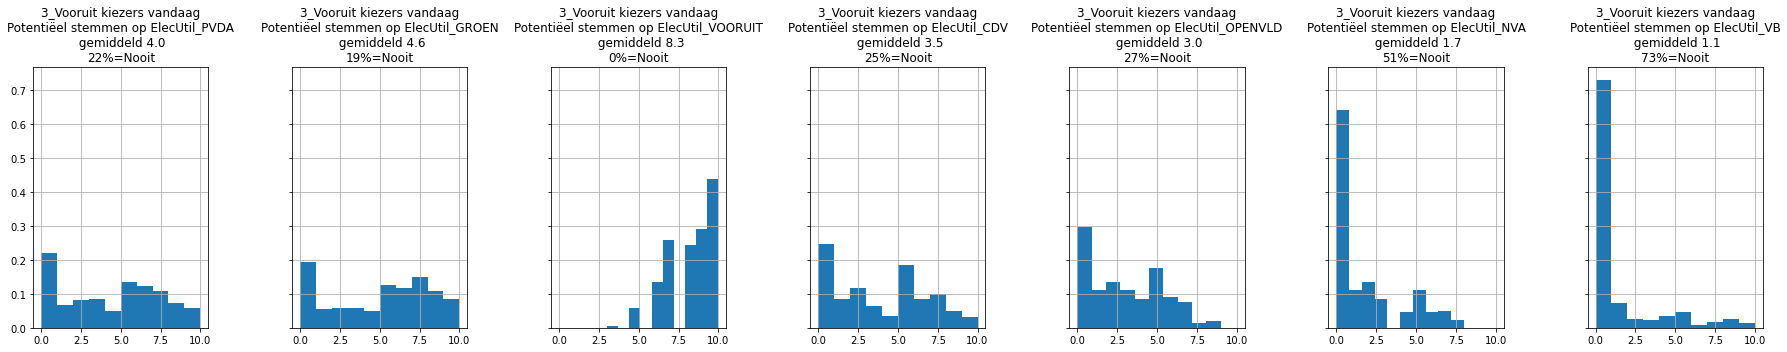

In [149]:
fig, axes = plt.subplots(1,7, sharex=True, sharey=True, figsize=(25,5))

for i, partij in enumerate(['ElecUtil_PVDA', 'ElecUtil_GROEN', 'ElecUtil_VOORUIT', 'ElecUtil_CDV', 
                           'ElecUtil_OPENVLD', 'ElecUtil_NVA', 'ElecUtil_VB']):

    kiezers[partij].hist(ax=axes[i], density=True)
    axes[i].set_title('{} kiezers vandaag\nPotentiëel stemmen op {}\n gemiddeld {:.1f}\n{:.0f}%=Nooit'
                  .format(geselecteerde_partij, partij, kiezers[partij].mean(), np.mean(kiezers[partij]==0)*100))

fig.tight_layout()

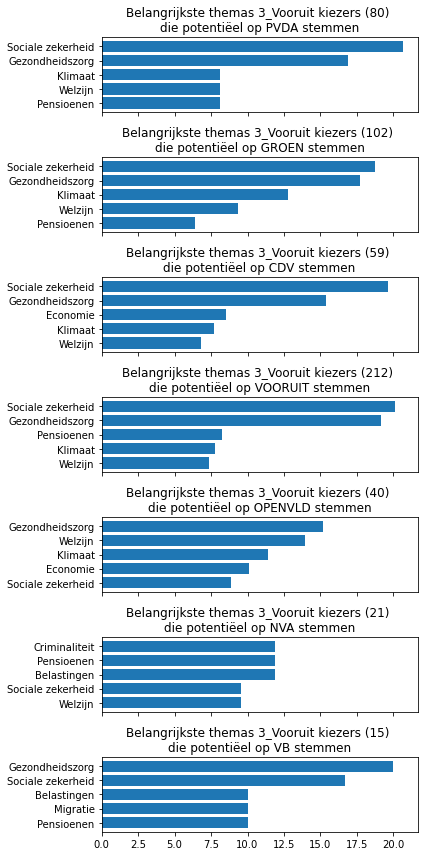

In [150]:
fig, axes = plt.subplots(7,1,figsize=(6,12), sharex=True)

for i, partij in enumerate(['PVDA', 'GROEN', 'CDV','VOORUIT', 'OPENVLD', 'NVA', 'VB']):
    
    row_mask = kiezers['ElecUtil_{}'.format(partij)]>5
    subset = kiezers.loc[row_mask,:]
    
    themas = (subset['MIP_Closed_1'].append(subset['MIP_Closed_2'])).value_counts(normalize=True).sort_values().tail(5)*100
    
    axes[i].barh(y = np.arange(len(themas)), width=themas, tick_label=themas.index)
    axes[i].set_title('Belangrijkste themas {} kiezers ({}) \ndie potentiëel op {} stemmen'.format(
        geselecteerde_partij, len(subset),partij))
fig.tight_layout()

2.8% verloren kiezers, kiezers die in 2019 stemden op 3_Vooruit en nu niet meer


Text(0.5, 1.0, 'Belangrijkste themas voor verloren kiezers van 3_Vooruit')

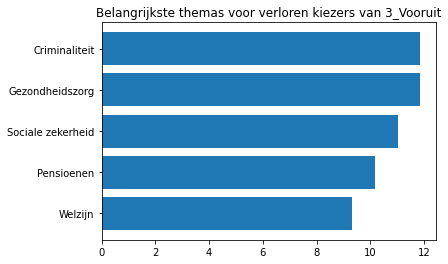

In [165]:
geselecteerde_partij_oude_naam = geselecteerde_partij if geselecteerde_partij!='3_Vooruit' else '3_sp.a'
row_mask = (data_raw['Vote2019_Fed']==geselecteerde_partij_oude_naam) & (data_raw['VoteChoiceNow']!=geselecteerde_partij)
verloren_kiezers = data_raw.loc[row_mask,:]

print('{:.1f}% verloren kiezers, kiezers die in 2019 stemden op {} en nu niet meer'.format(np.mean(row_mask)*100, geselecteerde_partij))

themas = (verloren_kiezers['MIP_Closed_1'].append(verloren_kiezers['MIP_Closed_2'])).value_counts(normalize=True).sort_values().tail(5)*100

fig, ax = plt.subplots(1,1)

ax.barh(y = np.arange(len(themas)), width=themas, tick_label=themas.index)
ax.set_title('Belangrijkste themas voor verloren kiezers van {}'.format(
        geselecteerde_partij))

## Voorlopig einde van de notebook

In [15]:
# Stem in 2019
potenteel_vote2019 = potentieel_vooruit['Vote2019_Fed'].value_counts(normalize=True).sort_index()*100
potenteel_vooruit_vote2019['3_sp.a']=0
potenteel_vooruit_vote2019 = potenteel_vooruit_vote2019.sort_index()

all_respondents_vote2019 = data_raw['Vote2019_Fed'].value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(20,5))

ax.bar(tick_label=potenteel_vooruit_vote2019.index, height=potenteel_vooruit_vote2019, 
            x=np.arange(len(potenteel_vooruit_vote2019))-0.2, width=0.4, label='Potentieel vooruit')
ax.bar(tick_label=all_respondents_vote2019.index, height=all_respondents_vote2019, 
            x=np.arange(len(all_respondents_vote2019))+0.2, width=0.4, label='Alle respondenten')

ax.tick_params(axis='x', labelrotation=45)
ax.grid()
ax.legend()
ax.set_title('Op wie stemden de potentiële Vooruit kiezers in 2019', size=15)
ax.set_ylabel('Percent')

NameError: name 'potentieel_vooruit' is not defined

In [ ]:
# Switch motief

# Van PVDA naar Vooruit
print('Beweegreden van PVDA naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '1_PVDA')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Groen naar Vooruit
print('\nBeweegreden van Groen naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '2_Groen')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van CD&V naar Vooruit
print('\nBeweegreden van CD&V naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '4_CD&V')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van OpenVLD naar Vooruit
print('\nBeweegreden van OpenVLD naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '5_Open VLD')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van N-VA naar Vooruit
print('\nBeweegreden van N-VA naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '6_N-VA')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Vlaams Belang naar Vooruit
print('\nBeweegreden van Vlaams-Belang naar Vooruit')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '3_VOORUIT') & (data_raw['Vote2019_Fed'] == '7_Vlaams Belang')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)

In [ ]:
# Van PVDA naar Vooruit
print('Beweegreden van Vooruit naar PVDA')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '1_PVDA') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Groen naar Vooruit
print('\nBeweegreden van Vooruit naar Groen')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '2_Groen') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van CD&V naar Vooruit
print('\nBeweegreden van Vooruit naar CD&V')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '4_CD&V') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van OpenVLD naar Vooruit
print('\nBeweegreden van Vooruit naar Open-VLD')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '5_Open VLD') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van N-VA naar Vooruit
print('\nBeweegreden van Vooruit naar N-VA')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '6_N-VA') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)
    
# Van Vlaams Belang naar Vooruit
print('\nBeweegreden van Vooruit naar Vlaams Belang')
print('---------------------------------')
row_mask = (data_raw['VoteChoiceNow'] == '7_Vlaams Belang') & (data_raw['Vote2019_Fed'] == '3_sp.a')
for motive in data_raw.loc[row_mask,'SwitchMotive'].dropna():
    print('+ '+motive)

In [ ]:
row_mask = (data_raw['ElecUtil_VOORUIT']>7) & (data_raw['Vote2019_Fed']!='3_sp.a')
potentieel_vooruit_grootste_probleem = (data_raw.loc[row_mask, 'MIP_Closed_1'].append(
                                        data_raw.loc[row_mask,'MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100
all_grootste_probleem = (data_raw['MIP_Closed_1'].append(data_raw['MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100

fig, ax = plt.subplots(1,1,figsize=(15,6))

ax.bar(x=np.arange(len(potentieel_vooruit_grootste_probleem))-0.2, height=potentieel_vooruit_grootste_probleem, 
              tick_label=potentieel_vooruit_grootste_probleem.index, width=0.4, label='Potentieel Vooruit')
ax.bar(x=np.arange(len(all_grootste_probleem))+0.2, height=all_grootste_probleem, 
              tick_label=all_grootste_probleem.index, width=0.4, label='Alle respondenten')


ax.tick_params(axis='x', labelrotation=60)
ax.grid()
ax.set_ylabel('Percent')
ax.set_title('Grootste probleem vandaag voor potentiele Vooruit kiezers (die in 2019 niet op Vooruit stemden)', size=15)
ax.legend()

In [ ]:
all_grootste_probleem = (data_raw['MIP_Closed_1'].append(data_raw['MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100


fig, axes = plt.subplots(7,1,figsize=(15,30))

for i in [1,2,3,4,5,6,7]:

    row_mask = (data_raw['VoteChoiceNow'].str[0]==str(i))
    if(sum(row_mask)==0):continue
    
    temp_partij = data_raw.loc[row_mask,'VoteChoiceNow'].iloc[0]
    grootste_probleem = (data_raw.loc[row_mask, 'MIP_Closed_1'].append(data_raw.loc[row_mask, 'MIP_Closed_2'])).value_counts(normalize=True).sort_index()*100


    axes[i-1].bar(x=np.arange(len(grootste_probleem))-0.2, height=grootste_probleem, tick_label=grootste_probleem.index,
      label=temp_partij, width=0.4)
    axes[i-1].bar(x=np.arange(len(all_grootste_probleem))+0.2, height=all_grootste_probleem, tick_label=all_grootste_probleem.index, 
      label='Alle respondenten', width=0.4)

    axes[i-1].tick_params(axis='x', labelrotation=60)
    axes[i-1].grid()
    axes[i-1].set_ylabel('Percent')
    axes[i-1].set_title('Grootste probleem vandaag voor {} kiezers'.format(temp_partij), size=15)
    axes[i-1].legend(loc='upper right')

fig.tight_layout()

In [ ]:
# Links-Rechts
fig, ax = plt.subplots(1,1,figsize=(5,5))
potentieel_vooruit['LeftRight'].plot.kde(ax=ax, label='Potentieel Vooruit')
data_raw['LeftRight'].plot.kde(ax=ax, label='All respondenten')
ax.grid()
ax.legend()
ax.set_xlabel('Links - Rechts')